File exist
Created folder named Anscombe_Quarter_Exercise
   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38    

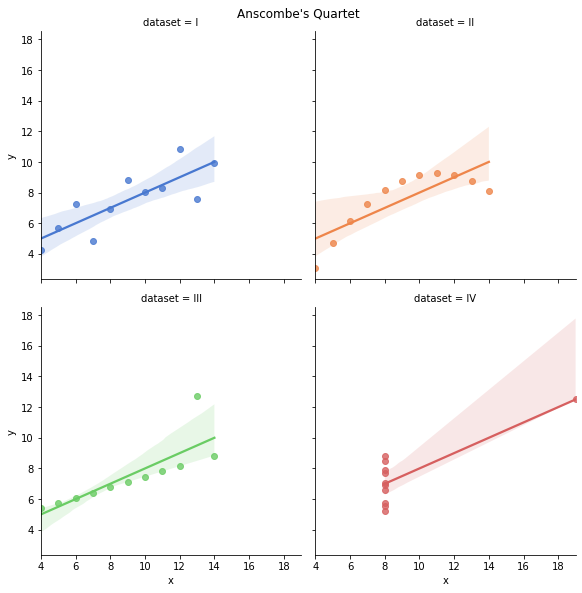

Created
Created CSV file named Anscombe_Calculations


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns


def creating_folder(Anscombe_Quarter_Exercise: str) -> None:
    """
    Creating a new folder or showing information about existing folder

    :param Anscombe_Quarter_Exercise:
    :return: None
    """
    if os.path.exists(Anscombe_Quarter_Exercise):
        print("File exist")
    else:
        os.makedirs(Anscombe_Quarter_Exercise)

    print("Created folder named Anscombe_Quarter_Exercise")


def anscombe_dataset_download() -> pd.DataFrame:
    """
    Download dataset from Anscombe Quarter

    :param Anscombe DataFrame
    :return: anscombe_df
    """
    anscombe_df = sns.load_dataset("anscombe")
    print(anscombe_df)
    return anscombe_df


def anscombe_dataset_plots(anscombe_df: pd.DataFrame) -> print:
    """
    Function which create 4 plots in one JPG

    :param anscombe_df:
    :return: Plot
    """
    sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe_df,
               col_wrap=2, palette="muted", height=4)
    plt.gcf().suptitle("Anscombe's Quartet", x=0.5, y=1)
    plt.savefig('Ascombe_Quarter_Exercise/anscombe_plot.jpg')
    plt.show()
    print("Created")


def anscombe_dataset_calculations(anscombe_df: pd.DataFrame) -> print:
    """
    Function that calculate mean, variance, correlation and standard deviation

    :param anscombe_df:
    :return: X / Y: mean, std, var AND correalation beetween X Y
    """
    grouped = anscombe_df.groupby('dataset')
    scores_into_csv_file = pd.DataFrame(columns=['mean_x', 'std_x', 'mean_y', 'std_y', 'correlation', 'var_x', 'var_y'])
    for key in grouped.groups.keys():
        scores_into_csv_file.loc[key] = (
            grouped.mean().loc[key]['x'],
            np.round(grouped.mean().loc[key]['y'], 2),
            np.round(grouped.std().loc[key]['x'], 5),
            np.round(grouped.std().loc[key]['y'], 2),
            np.round(grouped.corr().loc[(key, 'x')]['y'], 3),
            np.round(grouped.var().loc[key]['x'], 5),
            np.round(grouped.var().loc[key]['y'], 2),
        )

    scores_into_csv_file.to_csv('Anscombe_Quarter_Exercise/ascombe_calculations.csv')
    print("Created CSV file named Anscombe_Calculations")

def main():
    """
    Launching the program
    :return:
    """
    creating_folder("Anscombe_Quarter_Exercise")
    anscombe_df = anscombe_dataset_download()
    anscombe_dataset_plots(anscombe_df)
    anscombe_dataset_calculations(anscombe_df)

if __name__ == "__main__":
    main()